# Υπολογιστική Γεωμετρία - Εργασία 2023-2024

# Μέρος Α - Υλοποίηση 1: Κυρτό Περίβλημα
---

**Ιωάννης Πετράκης (1115201900155)**

**<u>1) <u>Κυρτό Περίβλημα σε 2 Διαστάσεις</u></u>**

**Κατηγόρημα Προσανατολισμού σε 2 Διαστάσεις**

Υπολογίζουμε το CCW($p_0, p_1, p_2$). Αν είναι:
*  Μηδέν, τότε τα σημεία είναι συνευθειακά
*  Θετικό, τότε η στροφή είναι αντίθετη της φοράς των δεικτών του ρολογιού (αριστερόστροφα - CCW)
* Αρνητικό, τότε η στροφή είναι ίδια με τη φορά των δεικτών του ρολογιού (δεξιόστροφα - CW)

In [1]:
# Calculate CCW

def orientation_predicate(p0, p1, p2):

  value = (p1[0]*p2[1] - p2[0]*p1[1]) - (p0[0]*p2[1] - p0[1]*p2[0]) + (p0[0]*p1[1] - p0[1]*p1[0]) # Determinant 3X3

  return value

**Εκτύπωση Κυρτού Περιβλήματος σε 2 Διαστάσεις**

Με τη συνάρτηση αυτή χρησιμοποιούμε το ConvexHull της Python, δίνοντάς του τα αρχικά μας σημεία, για την εκτύπωση του σχήματος με τη λύση.

In [9]:
# Visual representation of the convex hull in 2D

import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import ConvexHull, convex_hull_plot_2d

def plot_2D(points):

  print("\n                          PLOT OF CONVEX HULL:")
  points_array = np.array(points) # 2D Array with points
  hull = ConvexHull(points_array)

  # Plot
  plt.plot(points_array[:, 0], points_array[:, 1], 'o')
  for simplex in hull.simplices:
    plt.plot(points_array[simplex, 0], points_array[simplex, 1], 'k-')

  plt.show()

<u>Υλοποίηση αλγορίθμων για την εύρεση κυρτού περιβλήματος στο επίπεδο (2 διαστάσεις)</u>:

* **Αυξητικός Αλγόριθμος Graham Scan**

Είσοδος: Ένα σύνολο σημείων σε γενική θέση

Έξοδος: Μία λίστα των κορυφών του κυρτού περιβλήματος σε ωρολόγια διάταξη

Τα σημεία ταξινομούνται με βάση την αύξουσα σειρά των τετμημένων τους. Αν δύο σημεία έχουν ίδια τετμημένη τότε αυτά ταξινομούνται με βάση την τεταγμένη τους.

Η μεταβλητή choice υπάρχει για να εκτυπωθούν κάποια επιπλέον αποτελέσματα ή αναλυτικά βήματα (για την οπτικοποίηση που ζητείται).

In [4]:
# Incremental Algorithm Graham Scan

def Graham_Scan(points, choice):

  Lup = []
  Ldown = []
  n = len(points) # number of points

  if choice == 0 or choice == 1:
    print("\nINCREMENTAL ALGORITHM GRAHAM SCAN\n")
  else:
    print("INCREMENTAL ALGORITHM GRAHAM SCAN")

  # Sort the points according to their x-value in increasing order
  # If more than one point has the smallest x value, take the one with the smallest y value
  points.sort(key = lambda p:[p[0], p[1]])

  # Print the sorted points
  if choice == 0 or choice == 1:
    print(str(n), "sorted random points:", points)

  # Find the first 2 points for Lup
  Lup.append(points[0]) # the point with the lowest x-coordinate
  Lup.append(points[1])

  if choice == 1:
    print("\nCreating Lup:\n" + "\nInsert the first 2 points of Lup: " + str(points[0]) + ", " + str(points[1]))

  # Lup
  for i in range(2, n):
    if choice == 1:
      print("Insert to Lup:", str(points[i]))
    Lup.append(points[i])
    while (len(Lup) > 2) and (orientation_predicate(Lup[-3], Lup[-2], Lup[-1]) > 0): # CounterClockWise, left turn
      if choice == 1:
        print("CCW(" + str(Lup[-3]) + ", " + str(Lup[-2]) + ", " + str(Lup[-1]) + ") > 0")
        print("Remove from Lup:", str(Lup[-2]))
      Lup.pop(-2)

  # Print Lup
  if choice == 0 or choice == 1:
    print("\nLup:", Lup)

  # Find the first 2 points for Ldown
  Ldown.append(points[n - 1])
  Ldown.append(points[n - 2])

  if choice == 1:
    print("\nCreating Ldown:\n" + "\nInsert the first 2 points of Ldown: " + str(points[n - 1]) + ", " + str(points[n - 2]))

  # L down
  for i in range(n - 3, -1, -1):
    if choice == 1:
      print("Insert to Ldown:", str(points[i]))
    Ldown.append(points[i])
    while (len(Ldown) > 2) and (orientation_predicate(Ldown[-3], Ldown[-2], Ldown[-1]) > 0): # CounterClockWise, left turn
      if choice == 1:
        print("CCW(" + str(Ldown[-3]) + ", " + str(Ldown[-2]) + ", " + str(Ldown[-1]) + ") > 0")
        print("Remove from Ldown:", str(Ldown[-2]))
      Ldown.pop(-2)

  # Print Ldown
  if choice == 0 or choice == 1:
    print("\nLdown:", Ldown)

  if choice == 1:
    print("\nRemove from Ldown the first and last point: " + str(Ldown[0]) + ", " + str(Ldown[-1]))

  # Remove first and last point from Ldown
  Ldown.pop(-1)
  Ldown.pop(0)

  if choice == 1:
    print("Ldown:", Ldown, "\n\nCombine Lup and Ldown")

  # Create convex hull
  convex_hull = Lup.copy()
  for i in range(0, len(Ldown)):
    convex_hull.append(Ldown[i])

  # Print convex hull
  print("\nConvex Hull:", convex_hull)
  print("\nConvex hull consists of", str(len(convex_hull)), "points.")

  return convex_hull

* **Αλγόριθμος QuickHull**

Χρησιμοποιείται η συνάρτηση <u>ConvexHull</u> που έχει υλοποιηθεί στη <u>βιβλιοθήκη scipy.spatial</u> της Python και υπολογίζει το κυρτό περίβλημα με τον <u>αλγόριθμο QuickHull</u>.

In [5]:
# QuickHull Algorithm

import numpy as np
from scipy.spatial import ConvexHull

def QuickHull(points):

  print("\nQUICKHULL ALGORITHM")
  convex_hull = []
  points = np.array(points)
  hull = ConvexHull(points)
  hull_points = points[hull.vertices]

  for t in hull_points:
    convex_hull.append((t[0], t[1]))

  print("\nConvex Hull:", convex_hull)
  print("\nConvex hull consists of", str(len(convex_hull)), "points.")

  return convex_hull

**2) <u>Εκφυλισμένες Περιπτώσεις</u>**

Συμπεριφορά των παραπάνω αλγορίθμων σε εκφυλισμένες περιπτώσεις:

* <u>Συνευθειακά σημεία</u>: Αν η είσοδος περιέχει πολλά συνευθειακά σημεία τότε οι αλγόριθμοι μπορεί να μην τα χειριστούν σωστά, οπότε χρειάζονται επιπλέον βήματα και έλεγχοι (μέθοδος απειροελάχιστης διαταραχής).

* <u>Διπλότυπα σημεία</u>: Οι αλγόριθμοι υποθέτουν ότι το κάθε σημείο είναι μοναδικό. Οπότε το να υπάρχουν διπλότυπα μπορεί να προκαλέσει περίεργη συμπεριφορά και λάθος αποτελέσματα. Είναι σημαντικό πριν δώσουμε την είσοδο να έχουμε αφαιρέσει όλα τα διπλότυπα.

* Υπάρχουν τρόποι κατανομής των σημείων που κάνουν τους αλγορίθμους λιγότερο αποτελεσματικούς ή να αποτύχουν. Μία περίπτωση είναι αν τα σημεία βρίσκονται σε μία <u>ευθεία</u>. Πρέπει να γίνονται επιπλέον έλεγχοι και τροποποιήσεις στους αλγορίθμους για τέτοιες ειδικές περιπτώσεις.

* <u>Floating point precision</u>: Λάθη λόγω αριθμητικής ακρίβειας στους υπολογισμούς που μπορεί να δώσουν λάθος αποτελέσματα.

**3) <u>Περισσότερες από 3 διαστάσεις</u>**

Graham Scan: Ο Graham Scan, όπως πολλοί αλγόριθμοι για τον υπολογισμό του κυρτού περιβλήματος, βασίζεται σε μεγάλο βαθμό σε γεωμετρικές ιδιότητες, ειδικές για δύο διαστάσεις. Ενώ μπορεί να επεκταθεί σε τρεις διαστάσεις θεωρητικά, η πρακτική εφαρμογή και η αποτελεσματικότητά του υποφέρουν καθώς αυξάνονται οι διαστάσεις. Οπότε όχι!

Quickhull: Σε υψηλότερες διαστάσεις,ο Quickhull λειτουργεί παρόμοια με 2D και 3D. Διαχωρίζει τον χώρο χρησιμοποιώντας υπερεπίπεδα και κατασκευάζει επαναληπτικά το κυρτό περίβλημα, εντοπίζοντας τα σημεία που βρίσκονται πιο μακριά από τα υπερεπίπεδα. 
Ωστόσο, καθώς αυξάνεται η διάσταση, η υπολογιστική πολυπλοκότητα του Quickhulν αυξάνεται σημαντικά.

**<u>Εφαρμογή A</u>**

**1) <u>Δημιουργία Σημείων</u>**

Δημιουργία τυχαίων σημείων σε δύο διαστάσεις σε γενική θέση:

* Συνάρτηση **points_2D:** Οι συντεταγμένες των σημείων είναι ακέραιοι αριθμοί με τετμημένη $MIN\leq x\leq MAX$ και τεταγμένη $MIN\leq y\leq MAX$ . Για να βρίσκονται όλα τα σημεία σε γενική θέση, γίνεται κατάλληλος έλεγχος κατά τη δημιουργία και εισαγωγή των σημείων στη λίστα initial_points, υπολογίζοντας το κατηγόρημα προσανατολισμού (orientation_predicate). Έτσι ξέρουμε ότι δεν υπάρχει τριάδα σημείων που να είναι συνευθειακά. Όμως αυτή η συνάρτηση έχει μεγάλη χρονική πολυπλοκότητα.

* Συνάρτηση **generate_points_2D:** Οι συντεταγμένες των σημείων είναι δεκαδικοί αριθμοί μεγάλης ακρίβειας, με τετμημένη $0\leq x\leq 100$ και τεταγμένη $0\leq y\leq 100$. Δε γίνεται άμεσα κάποιος έλεγχος για το αν τα σημεία βρίσκονται σε γενική θέση, όμως αυτό υποθέτουμε διότι λόγω της μεγάλης ακρίβειας των συντεταγμένων τους είναι σχεδόν απίθανο να υπάρχει τριάδα σημείων που να είναι συνευθειακά. Η συνάρτηση δημιουργήθηκε για να μπορούμε να δημιουργήσουμε γρήγορα έναν μεγάλο αριθμό σημείων.

In [6]:
# Create random points in generic position

from numpy import random
import matplotlib.pyplot as plt

def points_2D(size, minimum, maximum):

  # Create the first 2 points
  initial_points = [(random.randint(minimum, maximum), random.randint(minimum, maximum)) for i in range(2)]

  # Create points in generic position
  while len(initial_points) < size:
    new_point = (random.randint(minimum, maximum), random.randint(minimum, maximum))
    flag = 1
    for i in range(0, len(initial_points) - 1):
      x1 = initial_points[i]
      for j in range(i + 1, len(initial_points)):
        x2 = initial_points[j]
        if (orientation_predicate(x1, x2, new_point) == 0):
          flag = 0
          break
      if (flag == 0):
        break
    if (flag == 1):
      initial_points.append(new_point)

  return initial_points

# The random nature of the coordinates should make it unlikely that any 3 points will be collinear
def generate_points_2D(n):
  points = []
  for i in range(n):
      x = random.random() * 100
      y = random.random() * 100
      points.append((x, y))

  return points


**α) <u>Κυρτό Περίβλημα σε 2 Διαστάσεις</u>**

Βρίσκουμε το κυρτό περίβλημα μιας λίστας σημείων initial_points και παρουσιάζουμε τα αποτελέσματα σαν λίστα σημείων και σχηματικά.

**Αυξητικός Αλγόριθμος, Αλγόριθμος QuickHull**
* Δημιουργία 85 τυχαίων σημείων που βρίσκονται σε γενική θέση, με τετμημένη $0\leq x\leq 100$ και τεταγμένη $0\leq y\leq 100$.

85 random points in generic position:
[(78, 90), (35, 71), (37, 59), (95, 44), (15, 22), (77, 88), (8, 17), (33, 33), (55, 25), (43, 27), (32, 39), (60, 60), (13, 86), (55, 39), (59, 21), (44, 65), (58, 90), (1, 0), (10, 29), (38, 44), (58, 20), (54, 30), (76, 46), (77, 79), (27, 68), (18, 11), (78, 21), (45, 3), (23, 97), (53, 0), (87, 8), (94, 99), (94, 45), (36, 41), (80, 93), (62, 29), (12, 82), (42, 10), (21, 48), (92, 43), (66, 98), (21, 9), (15, 62), (80, 5), (30, 48), (66, 88), (12, 16), (45, 73), (11, 58), (70, 72), (59, 79), (61, 54), (97, 80), (14, 10), (16, 42), (91, 22), (63, 94), (75, 12), (25, 34), (0, 27), (96, 11), (2, 45), (43, 89), (96, 60), (95, 23), (44, 99), (74, 19), (10, 98), (40, 31), (52, 16), (11, 73), (71, 75), (29, 67), (74, 8), (1, 97), (27, 58), (51, 52), (29, 78), (32, 9), (69, 94), (53, 13), (97, 47), (51, 62), (98, 63), (13, 49)]

                             INITIAL POINTS:


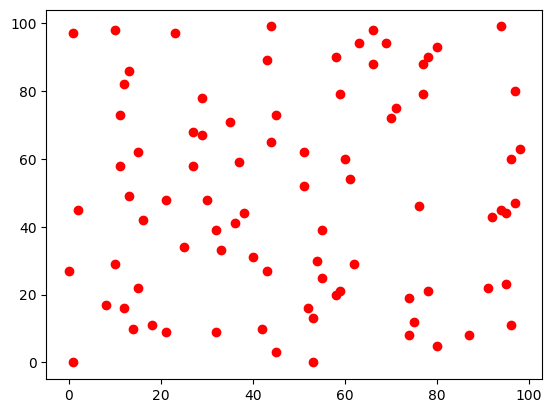


INCREMENTAL ALGORITHM GRAHAM SCAN

85 sorted random points: [(0, 27), (1, 0), (1, 97), (2, 45), (8, 17), (10, 29), (10, 98), (11, 58), (11, 73), (12, 16), (12, 82), (13, 49), (13, 86), (14, 10), (15, 22), (15, 62), (16, 42), (18, 11), (21, 9), (21, 48), (23, 97), (25, 34), (27, 58), (27, 68), (29, 67), (29, 78), (30, 48), (32, 9), (32, 39), (33, 33), (35, 71), (36, 41), (37, 59), (38, 44), (40, 31), (42, 10), (43, 27), (43, 89), (44, 65), (44, 99), (45, 3), (45, 73), (51, 52), (51, 62), (52, 16), (53, 0), (53, 13), (54, 30), (55, 25), (55, 39), (58, 20), (58, 90), (59, 21), (59, 79), (60, 60), (61, 54), (62, 29), (63, 94), (66, 88), (66, 98), (69, 94), (70, 72), (71, 75), (74, 8), (74, 19), (75, 12), (76, 46), (77, 79), (77, 88), (78, 21), (78, 90), (80, 5), (80, 93), (87, 8), (91, 22), (92, 43), (94, 45), (94, 99), (95, 23), (95, 44), (96, 11), (96, 60), (97, 47), (97, 80), (98, 63)]

Lup: [(0, 27), (1, 97), (10, 98), (44, 99), (94, 99), (97, 80), (98, 63)]

Ldown: [(98, 63), (96, 11

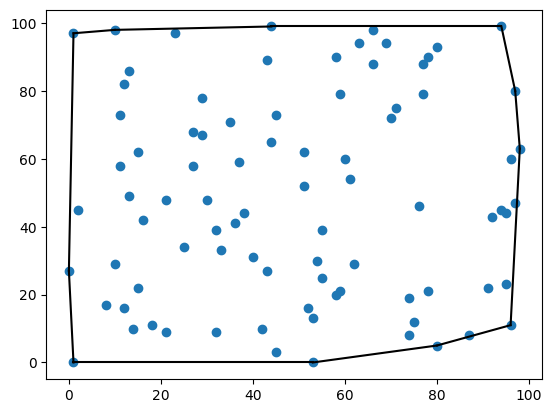

In [10]:
# Create 85 random points in generic position for all of the algorithms: Graham Scan, Gift Wrapping, QuickHull
initial_points = points_2D(85, 0, 101)

# Print the points
print(str(len(initial_points)) + " random points in generic position:")
print(initial_points)

# Visual representation of the points
print("\n                             INITIAL POINTS:")
xs = []
ys = []

for i in range(0, len(initial_points)):
  t = initial_points[i]
  xs.append(t[0])
  ys.append(t[1])

# Plot
plt.scatter(xs, ys, color="red")
plt.show()

# Incremental Algorithm: Graham Scan
convex_hull1 = Graham_Scan(initial_points, 0) # Solution

# QuickHull Algorithm
convex_hull3 = QuickHull(initial_points) # Solution

# Visual representation
plot_2D(initial_points)

Τη λίστα των σημείων του κυρτού περιβλήματος (δηλαδή τη λύση) τη βρίσκουμε με τον αλγόριθμο που υλοποιήσαμε. Μετά χρησιμοποιούμε το ConvexHull της Python, δίνοντάς του τα αρχικά μας σημεία, για την εκτύπωση του σχήματος με τη λύση. Έτσι επαληθεύουμε και οπτικά το αποτέλεσμα που έχουμε βρει.

Στο αποτέλεσμα του Graham Scan εκτυπώνουμε και τα $L_{άνω}$ και $L_{κάτω}$ (πριν του αφαιρέσουμε το πρώτο και το τελευταίο σημείο για την ένωση με το $L_{άνω}$) που προέκυψαν από την εκτέλεση του αλγορίθμου.

**β) <u>Οπτικοποίηση Βημάτων</u>**

Οπτικοποίηση των βημάτων του αλγορίθμου <u>Graham Scan</u> για την κατασκευή του κυρτού περιβλήματος στο επίπεδο
* Δημιουργούμε 15 τυχαία σημεία στο επίπεδο σε γενική θέση

15 random points in generic position:
[(5, 16), (10, 1), (0, 10), (1, 12), (3, 3), (3, 9), (9, 9), (15, 10), (19, 15), (9, 14), (14, 17), (11, 3), (6, 14), (15, 13), (4, 7)]

INCREMENTAL ALGORITHM GRAHAM SCAN

15 sorted random points: [(0, 10), (1, 12), (3, 3), (3, 9), (4, 7), (5, 16), (6, 14), (9, 9), (9, 14), (10, 1), (11, 3), (14, 17), (15, 10), (15, 13), (19, 15)]

Creating Lup:

Insert the first 2 points of Lup: (0, 10), (1, 12)
Insert to Lup: (3, 3)
Insert to Lup: (3, 9)
CCW((1, 12), (3, 3), (3, 9)) > 0
Remove from Lup: (3, 3)
Insert to Lup: (4, 7)
Insert to Lup: (5, 16)
CCW((3, 9), (4, 7), (5, 16)) > 0
Remove from Lup: (4, 7)
CCW((1, 12), (3, 9), (5, 16)) > 0
Remove from Lup: (3, 9)
Insert to Lup: (6, 14)
Insert to Lup: (9, 9)
CCW((5, 16), (6, 14), (9, 9)) > 0
Remove from Lup: (6, 14)
Insert to Lup: (9, 14)
CCW((5, 16), (9, 9), (9, 14)) > 0
Remove from Lup: (9, 9)
Insert to Lup: (10, 1)
Insert to Lup: (11, 3)
CCW((9, 14), (10, 1), (11, 3)) > 0
Remove from Lup: (10, 1)
Insert to 

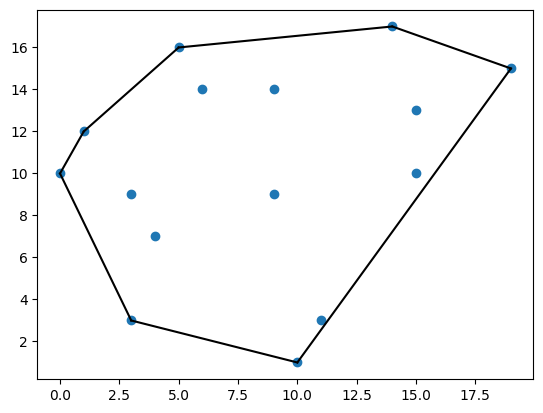

In [11]:
# Create and print the points in generic position

points_graham = points_2D(15, 0, 20)
print(str(len(points_graham)), "random points in generic position:")
print(points_graham)

# Incremental Algorithm: Graham Scan
convex_hull_graham = Graham_Scan(points_graham, 1) # Solution

# Visual representation
plot_2D(points_graham)

**2) <u>Διάφορα Πλήθη Σημείων</u>**

Θεωρούμε διάφορα πλήθη σημείων στο επίπεδο και συγκρίνουμε τους παραπάνω αλγορίθμους με βάση τον χρόνο υλοποίησής τους και την ποιότητα των αποτελεσμάτων.

Για όλους τους αλγορίθμους δημιουργούμε τα σημεία με τη συνάρτηση generate_points_2D().

**Περίπτωση 1: 2.000 σημεία**

In [12]:
import time

# Create random points in generic position
points1 = generate_points_2D(2000)

# Incremental Algorithm Graham Scan
start_time = time.time() # Get the current time in seconds
ch1_1 = Graham_Scan(points1, -1)
end_time = time.time() # Get the current time again
elapsed_time = end_time - start_time # Calculate the elapsed time
print(f"\nGraham Scan time: {elapsed_time:.2f} seconds") # Print the elapsed time with 2 decimal places

# QuickHull Algorithm
start_time = time.time()
ch3_1 = QuickHull(points1)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"\nQuickHull time: {elapsed_time:.2f} seconds")


INCREMENTAL ALGORITHM GRAHAM SCAN

Convex Hull: [(0.02049681503082379, 57.0558693313987), (0.20412319969819182, 71.81279599223805), (1.052736926494624, 92.78516468922415), (1.6091985680016352, 99.12551611076134), (3.145576397044625, 99.74949041408723), (27.050200653126677, 99.90311074262208), (83.66598092696164, 99.99908636990476), (95.83760465143557, 99.53053421608445), (99.1832160995057, 87.52890716184768), (99.35139838260486, 86.46528402778206), (99.89855178040918, 76.45572509735848), (99.88101607998401, 56.5381700233727), (99.8495553422967, 21.0679462105125), (98.54337976170497, 3.9650876843593252), (97.05990782399454, 0.05602578478314246), (93.41296325072167, 0.041055253012511894), (9.415106127562023, 0.008863817388449213), (0.098907002386317, 0.15532689226886998)]

Convex hull consists of 18 points.

Graham Scan time: 0.01 seconds

QUICKHULL ALGORITHM

Convex Hull: [(0.02049681503082379, 57.0558693313987), (0.098907002386317, 0.15532689226886998), (9.415106127562023, 0.0088638173

**Περίπτωση 2: 10.000 σημεία**

In [13]:
import time

# Create random points in generic position
points2 = generate_points_2D(10000)

# Incremental Algorithm Graham Scan
start_time = time.time()
ch1_2 = Graham_Scan(points2, -1)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"\nGraham Scan time: {elapsed_time:.2f} seconds")

# QuickHull Algorithm
start_time = time.time()
ch3_2 = QuickHull(points2)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"\nQuickHull time: {elapsed_time:.2f} seconds")


INCREMENTAL ALGORITHM GRAHAM SCAN

Convex Hull: [(0.001569963196002, 18.825042119672965), (0.01579403576382754, 79.66293022391001), (0.12782789867611388, 95.33837657780963), (0.3016345423369371, 99.19724833868025), (0.768853244859713, 99.97189729925357), (50.59657798630358, 99.99463608681167), (94.96950002033103, 99.95887315298995), (98.38850540186712, 99.72493972007128), (98.48446141717115, 99.7056865382692), (99.84160714294362, 98.82716974660529), (99.99534009340142, 78.32392310335034), (99.97717075128864, 54.27071112645376), (99.93095202518899, 5.52811926459661), (99.4711054327617, 0.5404546831934698), (90.17584282576655, 0.06849264121646659), (78.40478979065796, 0.026693233906782687), (77.0668900845344, 0.02483564885789047), (23.8630169294099, 0.011316162423413711), (2.5010493249274957, 0.026814704344924056), (0.6796971301673116, 0.23799701868428835), (0.27250990927581986, 1.1162830448890326), (0.05281128247771605, 8.989892639870023)]

Convex hull consists of 22 points.

Graham Sca

**Περίπτωση 3: 40.000 σημεία**

In [15]:
import time

# Create random points in generic position
points3 = generate_points_2D(40000)

# Incremental Algorithm Graham Scan
start_time = time.time()
ch1_3 = Graham_Scan(points3, -1)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"\nGraham Scan time: {elapsed_time:.2f} seconds")

# QuickHull Algorithm
start_time = time.time()
ch3_3 = QuickHull(points3)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"\nQuickHull time: {elapsed_time:.2f} seconds")


INCREMENTAL ALGORITHM GRAHAM SCAN

Convex Hull: [(0.003802092396287815, 53.662756519938796), (0.02639843160724409, 99.08112217357461), (0.3669745208665143, 99.93200497177993), (4.241018591413748, 99.96553036036809), (6.1168339368413704, 99.96979189739551), (19.703725060941313, 99.99696251756156), (41.18829374691828, 99.99845412843942), (64.99232219506204, 99.99870259106484), (78.47969505543996, 99.99802070742217), (93.48189327622993, 99.98680009232253), (97.82331198547315, 99.97613126735081), (99.63799485010621, 99.80023472396157), (99.84441608750613, 97.8915527280418), (99.8692412722475, 97.09244642758185), (99.99166341298839, 92.60333160217121), (99.99642508168644, 59.10694415772173), (99.99467696017555, 13.590195811456873), (99.97274349845769, 4.915053754863563), (99.95650934261914, 2.250760381131922), (99.80596838974103, 0.03227093980964213), (97.5260612926217, 0.01093001118132042), (40.033877364292124, 0.000928932712807029), (26.962418946300872, 0.0017716947851798004), (11.0330246

**Χρόνος Υλοποίησης Αλγορίθμων**

Από την τελευταία περίπτωση μπορούμε να συμπεράνουμε ότι η σειρά των αλγορίθμων από τον πιο γρήγορο στον πιο αργό είναι η εξής:

1) Quick Hull \\
2) Graham Scan \\